In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the employee dataset
file_path = "data/processed/train.csv"
df = pd.read_csv(file_path)

# Set visualization aesthetics
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Basic Information
summary = {
    "Shape": df.shape,
    "Missing Values": df.isnull().sum(),
    "Attrition Counts": df['Attrition'].value_counts(),
    "Data Types": df.dtypes
}
print(summary)

{'Shape': (47678, 24), 'Missing Values': Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64, 'Attrition Counts': Attrition
Stayed    25008
Left      22670
Name: count, dtype: int64, 'Data Types': Employee ID                  int64
Age                          int64
Gender                      object
Years at Company 

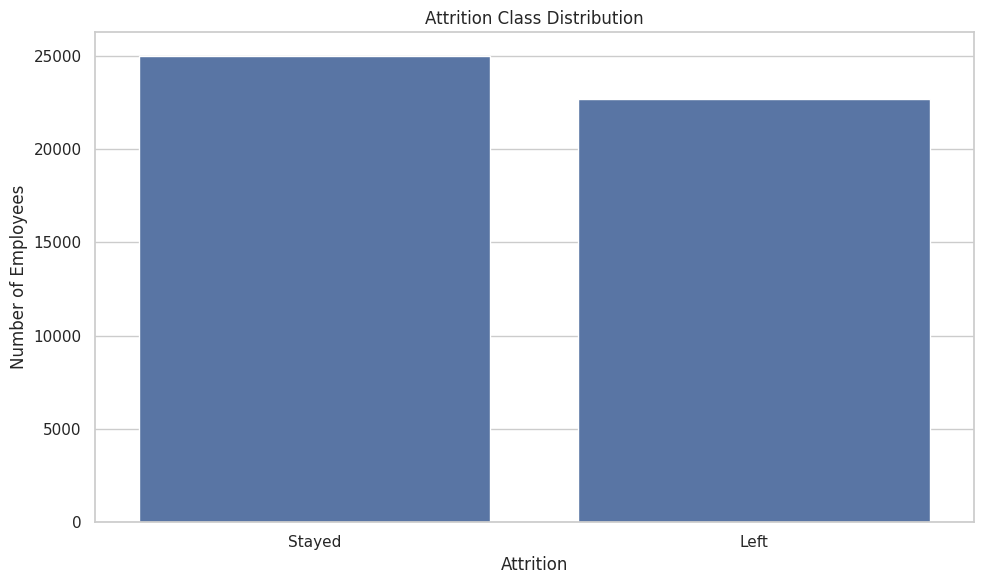

In [2]:
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Target Variable Distribution
attrition_counts = df['Attrition'].value_counts()

# Plot
plt.figure()
sns.barplot(x=attrition_counts.index, y=attrition_counts.values)
plt.title("Attrition Class Distribution")
plt.ylabel("Number of Employees")
plt.xlabel("Attrition")
plt.tight_layout()
plt.show()

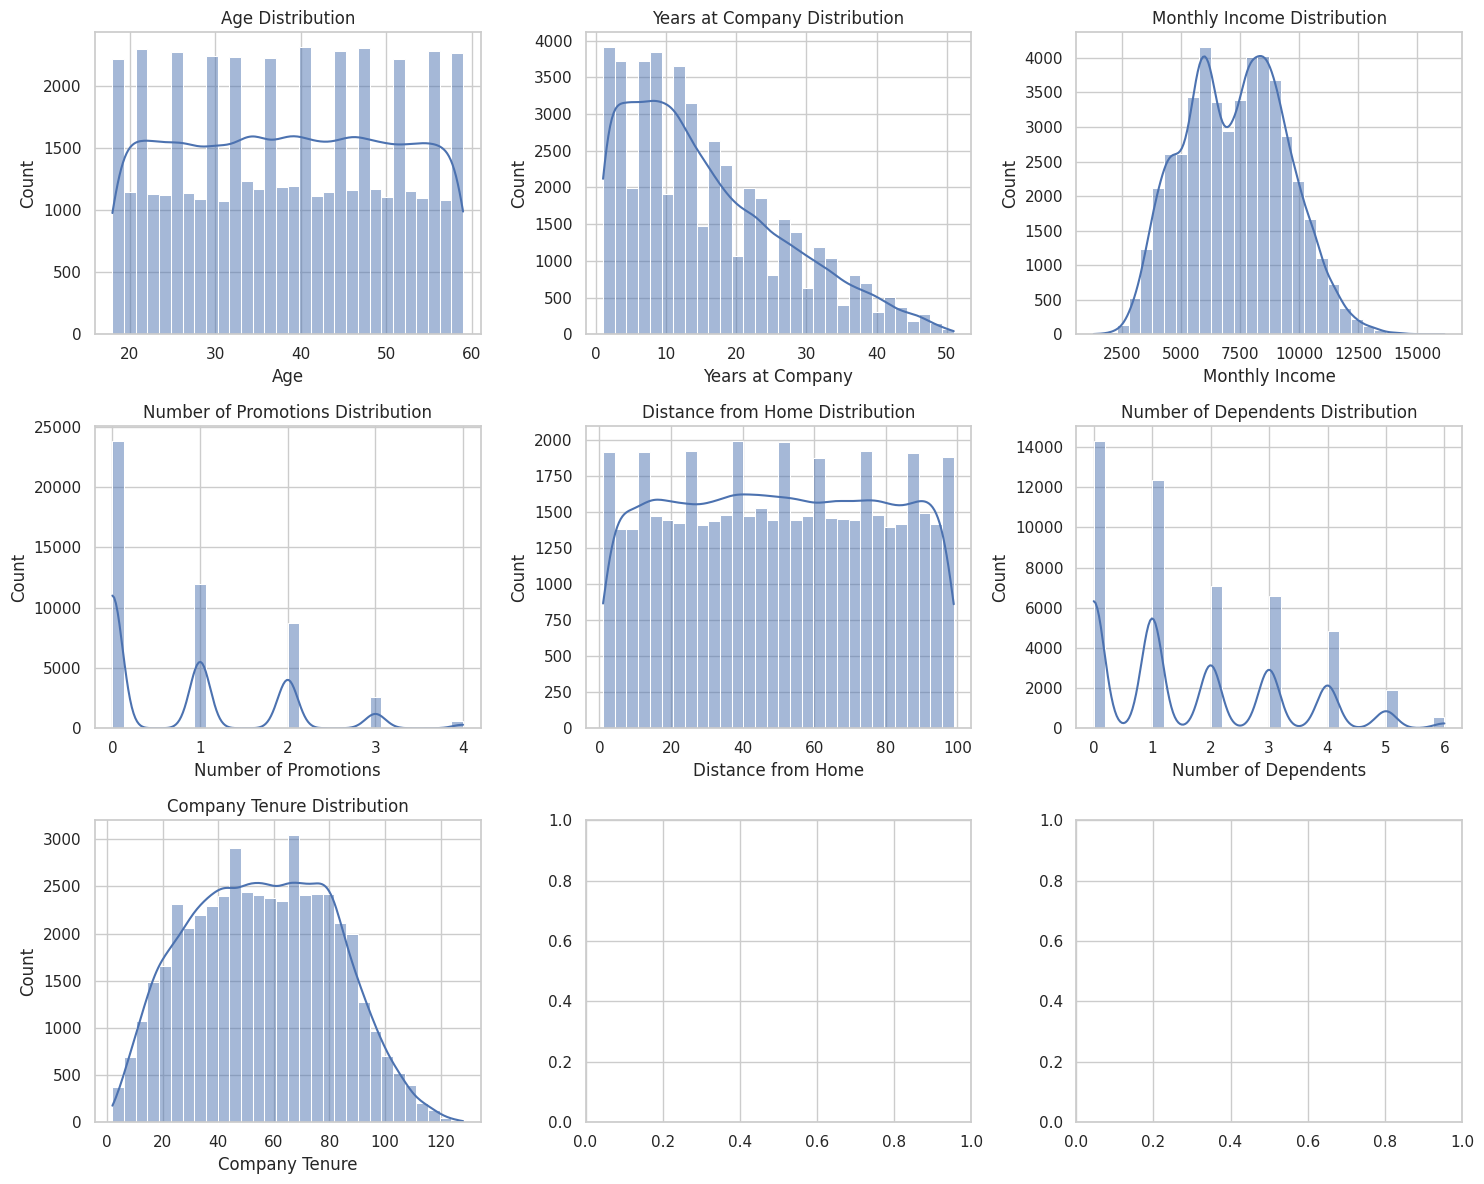

In [3]:
# Select numerical columns (excluding Employee ID)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Employee ID')

# Plot histograms for numerical features
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f"{col} Distribution")

plt.tight_layout()
plt.show()

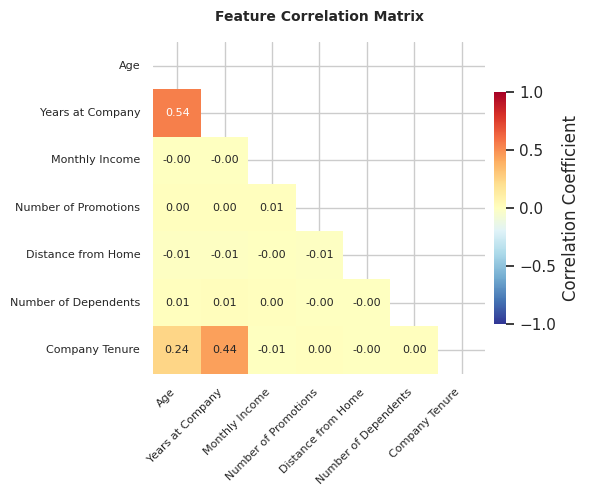

In [4]:
def plot_correlation_triangle(df, numerical_cols):
    """
    Plot triangular correlation heatmap with smaller boxes and full color range
    """
    # Compute correlation matrix
    correlation_matrix = df[numerical_cols].corr()
    
    # Calculate adaptive figure size based on number of features
    n_features = len(numerical_cols)
    base_size = 5
    size_factor = 0.2
    fig_size = min(base_size + n_features * size_factor, 10)
    
    # Create mask for upper triangle
    mask = np.triu(np.ones_like(correlation_matrix), k=0)
    
    # Create figure with adaptive size
    plt.figure(figsize=(fig_size, fig_size * 0.8))
    
    # Plot heatmap with mask
    sns.heatmap(correlation_matrix, 
                mask=mask,
                annot=True,
                fmt='.2f',
                cmap='RdYlBu_r',
                vmin=-1, 
                vmax=1,
                center=0,
                square=True,
                annot_kws={'size': 8},
                cbar_kws={'label': 'Correlation Coefficient',
                         'shrink': .7,
                         'aspect': 20,
                         'pad': 0.02})
    
    plt.title('Feature Correlation Matrix', 
             pad=15, 
             fontsize=10,
             fontweight='bold')
    
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.yticks(rotation=0, fontsize=8)
    
    plt.tight_layout()
    plt.show()

# Usage:
plot_correlation_triangle(df, numerical_cols)

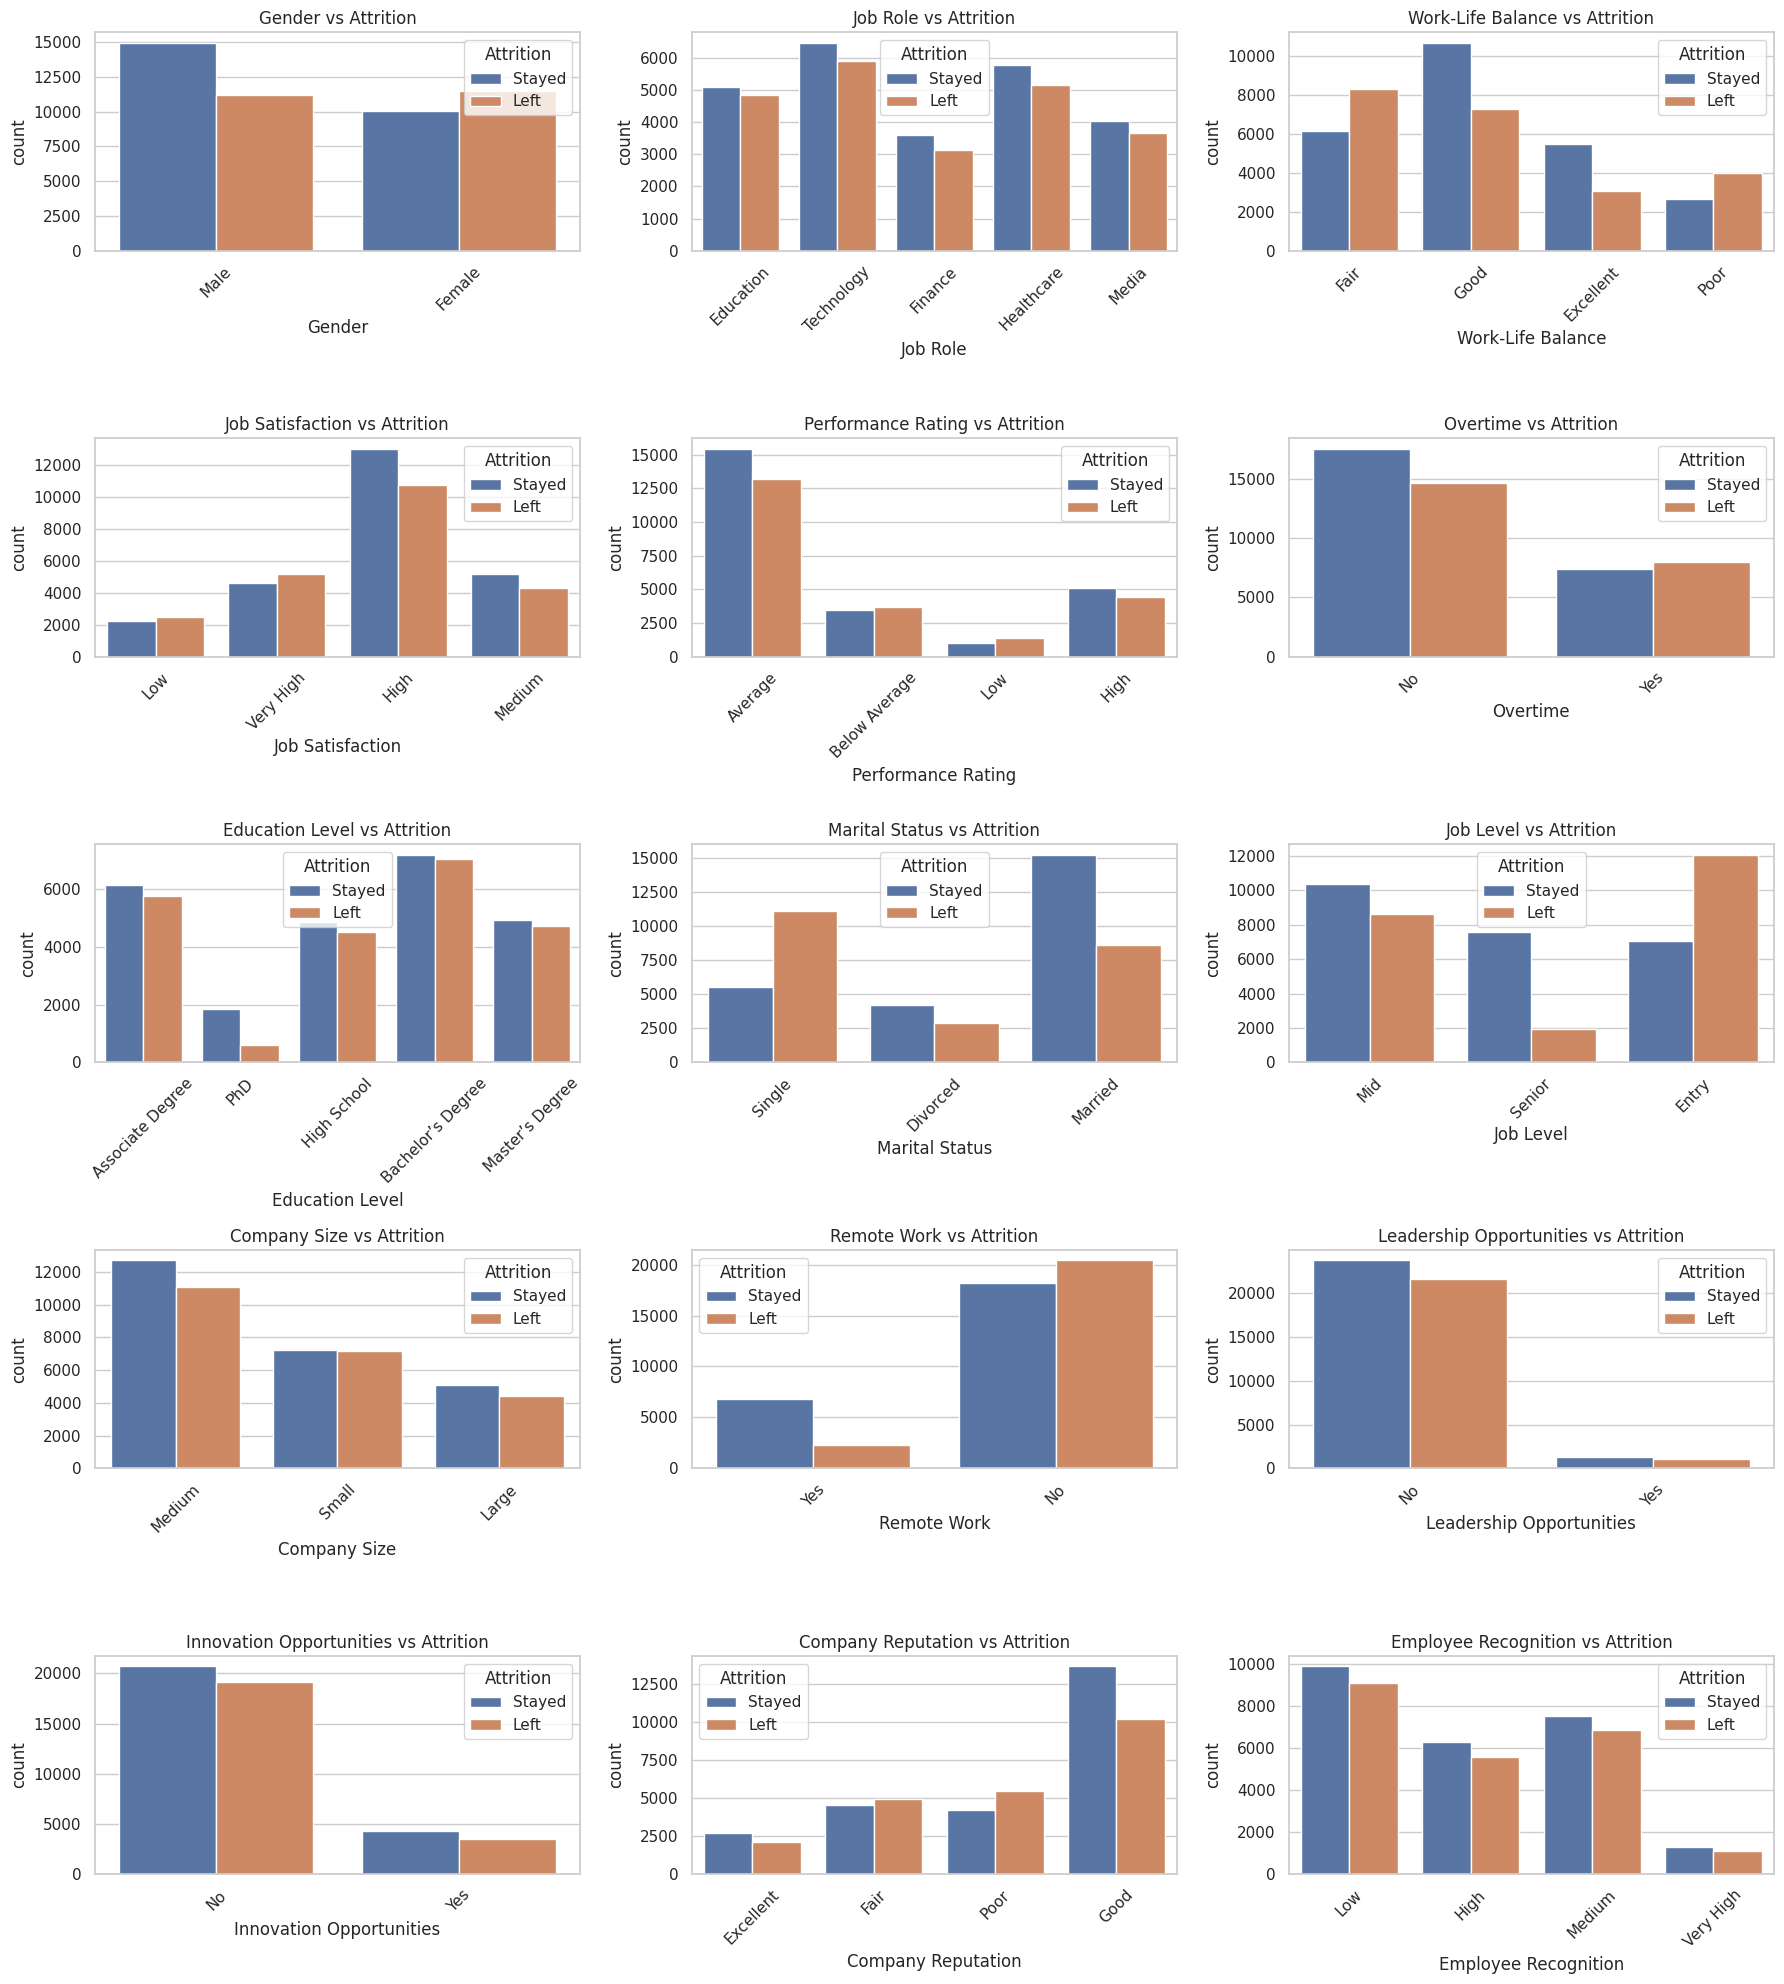

In [5]:
# Categorical features breakdown by Attrition
categorical_cols = df.select_dtypes(include=['object']).columns.drop('Attrition')

# Plot countplots for each categorical feature vs. Attrition
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue="Attrition", ax=axes[i])
    axes[i].set_title(f"{col} vs Attrition")
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
# Copy and preprocess data
df_encoded = df.copy()

# Encode categorical variables
label_encoders = {}
for col in categorical_cols.tolist() + ['Attrition']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Scale features
features = df_encoded.drop(columns=["Employee ID"])
X_scaled = StandardScaler().fit_transform(features.drop(columns=["Attrition"]))
y = features["Attrition"]

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette="coolwarm", alpha=0.6)
plt.title("t-SNE Projection of Employee Data")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.legend(title="Attrition", labels=["Stayed", "Left"])
plt.tight_layout()
plt.show()


/home/qinyaomou/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
